# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [60]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [61]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df["title_length"] = df["title"].apply(len)
df["title_length"]

0      24
1      13
2      22
3      15
4      12
       ..
974     7
975    27
976    47
977    11
978    11
Name: title_length, Length: 979, dtype: int64

In [62]:
# Calcula media, mediana y moda de la columna 'title_length'
media = df["title_length"].mean()
mediana = df["title_length"].median()
moda = df["title_length"].mode()

print(f"La media es: {media}")
print(f"La moda es: {moda}")
print(f"La mediana es: {mediana}")

La media es: 15.481103166496425
La moda es: 0    12
Name: title_length, dtype: int64
La mediana es: 14.0


In [63]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
import statistics as stats

rango = max(df["title_length"]) - min(df["title_length"])
varianza = stats.variance(df["title_length"])
std = stats.stdev(df["title_length"])

print(f"El rango es: {rango}")
print(f"La varianza es: {varianza}")
print(f"La desviación estándar es: {std}")

El rango es: 67
La varianza es: 72.10674888402882
La desviación estándar es: 8.49156928276681


In [64]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetria = skew(df["title_length"])
curtosis = kurtosis(df["title_length"])
print(f"La asimetría es: {asimetria}")
print(f"La curtosis es: {curtosis}")

La asimetría es: 1.5229143965677572
La curtosis es: 3.7867237597626007


In [65]:
# Imprime el título más corto y el título más largo según su longitud
corto = df.loc[df["title_length"].idxmin(), "title"]
largo = df.loc[df["title_length"].idxmax(), "title"]

print(f"El título más corto es: {corto}")
print(f"El título más largo es: {largo}")

El título más corto es: M
El título más largo es: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


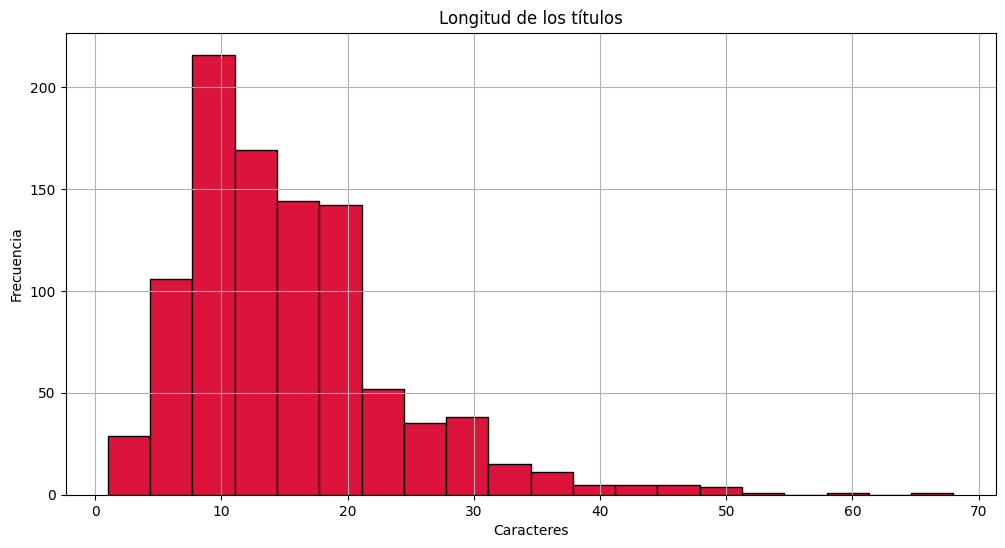

In [66]:
# grafica tus resultados
plt.figure(figsize=(12, 6))
plt.hist(df["title_length"], bins = 20, edgecolor="black", color="crimson")
plt.title("Longitud de los títulos")
plt.xlabel("Caracteres")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [67]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
l = [10, 13, 14, 18, 22]

In [68]:
# Calcula la media de los 5 valores
media_l = sum(l) / len(l)
print(f"La media es: {media_l}")

La media es: 15.4


In [69]:
# Calcula las diferencias al cuadrado con respecto a la media
suma_dif = sum((x - media_l)**2 for x in l)
print(f"Suma de diferencias al cuadrado: {suma_dif}")

Suma de diferencias al cuadrado: 87.19999999999999


In [70]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
varianza_l = suma_dif / len(l)
raiz = varianza_l ** 0.5
print(f"La varianza es: {varianza_l}")
print(f"Su raiz cuadrada es: {raiz}")

La varianza es: 17.439999999999998
Su raiz cuadrada es: 4.176122603564219
